# LSTM과 GRU 셀

In [9]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf # TensorFlow 라이브러리 임포트

tf.keras.utils.set_random_seed(42) # 랜덤 시드 설정

## LSTM 신경망 훈련하기

In [10]:
from tensorflow.keras.datasets import imdb # IMDB 영화 리뷰 데이터셋을 불러오기
from sklearn.model_selection import train_test_split # 데이터셋을 훈련 세트와 검증 세트로 나누기

# IMDB 데이터셋을 불러오고, 훈련 세트와 검증 세트로 나누기
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

# 훈련 세트와 검증 세트로 나누기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [11]:
# 시퀀스 데이터를 패딩하여 길이를 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# 훈련 데이터를 패딩하여 길이를 100으로 맞추기
train_seq = pad_sequences(train_input, maxlen=100) 

# 검증 데이터를 패딩하여 길이를 100으로 맞추기
val_seq = pad_sequences(val_input, maxlen=100) 

In [12]:
from tensorflow import keras # 케라스 모델을 생성합니다.

model = keras.Sequential() # 순차 모델을 생성합니다.

# LSTM 셀을 추가합니다. 입력 크기는 100이고, 출력 크기는 8입니다.
model.add(keras.layers.Embedding(500, 16, input_shape=(100,))) 

# LSTM 셀을 추가합니다. 출력 크기는 8입니다.
model.add(keras.layers.LSTM(8))

# 출력층을 추가합니다. 출력 크기는 1이고, 활성화 함수는 시그모이드입니다.
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다. 손실 함수는 이진 교차 엔트로피, 최적화 알고리즘은 Adam, 메트릭은 정확도입니다.
model.summary()

c:\Users\ryan9\miniconda3\envs\sesac_ai\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 최적화 알고리즘을 RMSprop으로 설정합니다.
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

# 모델을 컴파일합니다. 손실 함수는 이진 교차 엔트로피, 메트릭은 정확도입니다.
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 체크포인트와 조기 종료 콜백을 설정합니다.
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-lstm-model.keras',
                                                save_best_only=True)

# 조기 종료 콜백을 설정합니다. patience는 3으로 설정하고, 최상의 가중치를 복원합니다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# 모델을 훈련합니다. 에폭 수는 100, 배치 크기는 64로 설정하고, 검증 데이터를 사용합니다.
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5864 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5784 - loss: 0.6907 - val_accuracy: 0.6258 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6217 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6765
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6681 - loss: 0.6682 - val_accuracy: 0.7096 - val_loss: 0.6177
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7180 - loss: 0.6006 - val_accuracy: 0.7248 - val_loss: 0.5760
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7282 - loss: 0.5690 - val_accuracy: 0.7404 - val_loss: 0.5555
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7481 - loss: 0.5465 - val_accuracy: 0.7450 - val_loss: 0.5383
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7600 - loss: 0.5274 

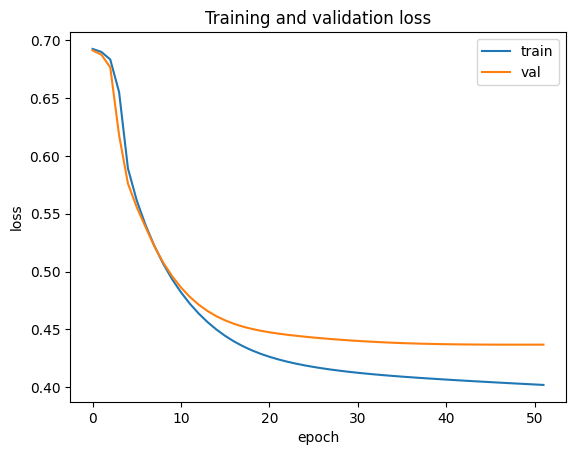

In [15]:
import matplotlib.pyplot as plt # 훈련 과정에서의 손실과 정확도를 시각화합니다.

plt.plot(history.history['loss']) # 훈련 손실을 플롯합니다.
plt.plot(history.history['val_loss']) # 검증 손실을 플롯합니다.
plt.xlabel('epoch') # x축 레이블을 설정합니다.
plt.ylabel('loss') # y축 레이블을 설정합니다.
plt.title('Training and validation loss') # 그래프 제목을 설정합니다.
plt.legend(['train', 'val']) # 범례를 추가합니다.
plt.show() # 훈련 과정에서의 손실과 정확도를 시각화합니다.

## 순환 층에 드롭아웃 적용하기

In [16]:
model2 = keras.Sequential() # 순차 모델을 생성합니다.

# LSTM 셀에 드롭아웃을 적용합니다. 입력 크기는 100이고, 출력 크기는 8입니다.
model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))

# LSTM 셀을 추가합니다. 출력 크기는 8이고, 드롭아웃 비율은 0.3입니다.
model2.add(keras.layers.LSTM(8, dropout=0.3))

# 드롭아웃을 적용한 LSTM 셀을 추가합니다. 출력 크기는 8이고, 드롭아웃 비율은 0.3입니다.
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
# 모델을 요약합니다.
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

# 모델을 컴파일합니다. 손실 함수는 이진 교차 엔트로피, 메트릭은 정확도입니다.
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

# 모델 요약을 출력합니다.
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-dropout-model.keras',
                                                save_best_only=True)

# 조기 종료 콜백을 설정합니다. patience는 3으로 설정하고, 최상의 가중치를 복원합니다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# 모델을 훈련합니다. 에폭 수는 100, 배치 크기는 64로 설정하고, 검증 데이터를 사용합니다.
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.5716 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5619 - loss: 0.6920 - val_accuracy: 0.6068 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6025 - loss: 0.6902 - val_accuracy: 0.6288 - val_loss: 0.6879
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6257 - loss: 0.6865 - val_accuracy: 0.6490 - val_loss: 0.6809
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6458 - loss: 0.6773 - val_accuracy: 0.6560 - val_loss: 0.6494
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6848 - loss: 0.6394 - val_accuracy: 0.7270 - val_loss: 0.5991
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7198 - loss: 0.5997 - val_accuracy: 0.7404 - val_loss: 0.5803
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7326 - loss: 0.5804 -

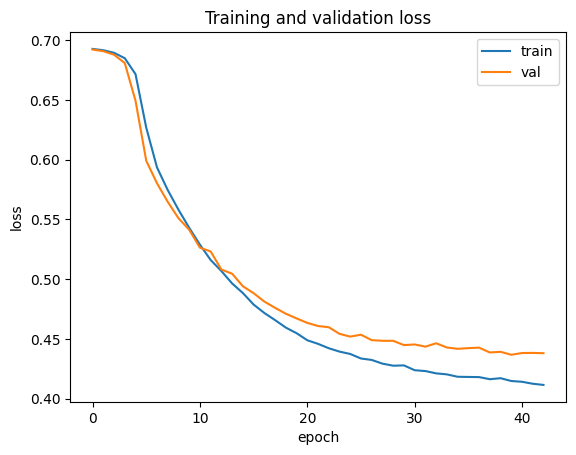

In [18]:
plt.plot(history.history['loss']) # 훈련 손실을 플롯합니다.
plt.plot(history.history['val_loss']) # 검증 손실을 플롯합니다.
plt.xlabel('epoch') # x축 레이블을 설정합니다.
plt.ylabel('loss') # y축 레이블을 설정합니다.
plt.title('Training and validation loss') # 그래프 제목을 설정합니다.
plt.legend(['train', 'val']) # 범례를 추가합니다.
plt.show() # 훈련 과정에서의 손실과 정확도를 시각화합니다.

## GRU 신경망 훈련하기

In [19]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()

# GRU 셀을 추가합니다. 입력 크기는 100이고, 출력 크기는 8입니다.
model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))

# GRU 셀을 추가합니다. 출력 크기는 8입니다.
model4.add(keras.layers.GRU(8))

# 출력층을 추가합니다. 출력 크기는 1이고, 활성화 함수는 시그모이드입니다.
model4.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델을 요약합니다.
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 최적화 알고리즘을 RMSprop으로 설정합니다.
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

# 모델을 컴파일합니다. 손실 함수는 이진 교차 엔트로피, 메트릭은 정확도입니다.
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

# 모델 체크포인트와 조기 종료 콜백을 설정합니다.
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-gru-model.keras',
                                                save_best_only=True)

# 조기 종료 콜백을 설정합니다. patience는 3으로 설정하고, 최상의 가중치를 복원합니다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# 모델을 훈련합니다. 에폭 수는 100, 배치 크기는 64로 설정하고, 검증 데이터를 사용합니다.
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4947 - loss: 0.6932 - val_accuracy: 0.5204 - val_loss: 0.6926
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5471 - loss: 0.6923 - val_accuracy: 0.5538 - val_loss: 0.6916
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5758 - loss: 0.6911 - val_accuracy: 0.5616 - val_loss: 0.6901
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5906 - loss: 0.6892 - val_accuracy: 0.5830 - val_loss: 0.6876
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5976 - loss: 0.6861 - val_accuracy: 0.5892 - val_loss: 0.6836
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6086 - loss: 0.6812 - val_accuracy: 0.5980 - val_loss: 0.6773
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6197 - loss: 0.6736 - val_accuracy: 0.6142 - val_loss: 0.6674
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6345 - loss: 0.6614 -

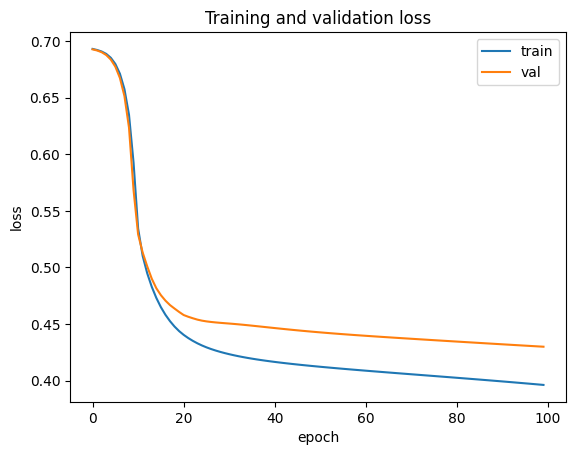

In [21]:
plt.plot(history.history['loss']) # 훈련 손실을 플롯합니다.
plt.plot(history.history['val_loss']) # 검증 손실을 플롯합니다.
plt.xlabel('epoch') # x축 레이블을 설정합니다.
plt.ylabel('loss') # y축 레이블을 설정합니다.
plt.title('Training and validation loss') # 그래프 제목을 설정합니다.
plt.legend(['train', 'val']) # 범례를 추가합니다.
plt.show() # 훈련 과정에서의 손실과 정확도를 시각화합니다.

## 마무리

In [23]:
test_seq = pad_sequences(test_input, maxlen=100) # 테스트 데이터를 패딩하여 길이를 100으로 맞추기

rnn_model = keras.models.load_model('models/best-gru-model.keras') # LSTM 모델을 불러옵니다.

rnn_model.evaluate(test_seq, test_target) # 테스트 데이터에 대한 모델의 성능을 평가합니다.

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8032 - loss: 0.4274


[0.42702269554138184, 0.8026800155639648]